In [1]:
import nltk

In [2]:
#nltk.download_shell()

In [3]:
# creating a spam detection system
# reading the smscollection data

messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
# printing first 10 messages from the file
for message_no,message in enumerate(messages[:10]):
    print(message_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [8]:
# there is a tab seperation so split setence using pandas for analysis
import pandas as pd


In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
# add length column
messages['Length'] = messages['message'].apply(len)

In [14]:
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# visualize data using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='Frequency'>

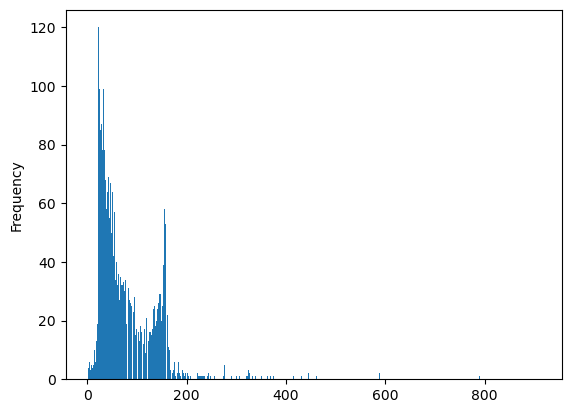

In [16]:
messages['Length'].plot(bins=1000,kind='hist')

In [17]:
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [18]:
# fetching the sentence with max length which is 910
messages[messages['Length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Looks like we have some sort of Romeo sending texts! But let's focus back on the idea of trying to see if message length is a distinguishing feature between ham and spam:

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

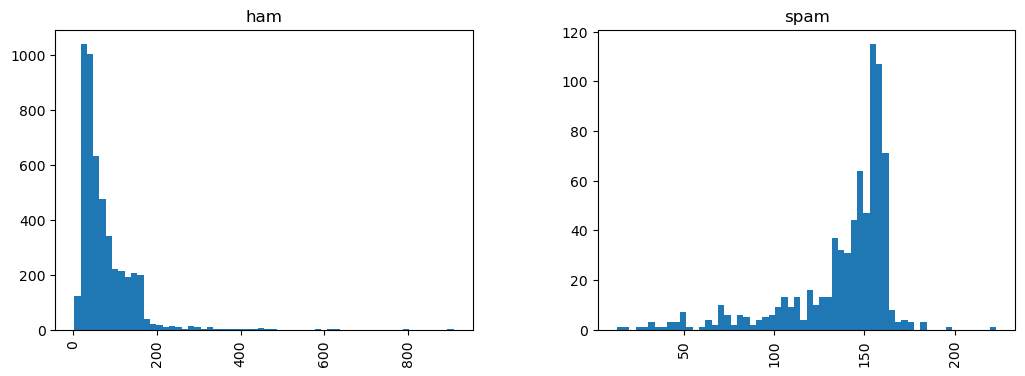

In [19]:
# plot a histogram with length as column
messages.hist(column='Length',by='label',bins=60,figsize=(12,4))

In [20]:
# in above data spam messages centerd around length 150

In [21]:
# Using bag of words method we are going to convert text(raw messages) into vector(sequence of number) format - each unique word will be represented by one number

# import string method
import string
print(string.punctuation[:5])

!"#$%


In [22]:
# create a sample sentence and check characters to see if they are in punctuation
mess = 'Sample message! Notice: it has punctuation.'
nopunc = [char for char in mess if char not in string.punctuation]
print(nopunc)

# joining the characters again form the string
nopunc=''.join(nopunc)
print(nopunc)

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']
Sample message Notice it has punctuation


In [23]:
# remvoing stopwords - most common english words
from nltk.corpus import stopwords
# printing few stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [24]:
# removing stopwords
print(nopunc.split()) # splitting data into words
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']


['Sample', 'message', 'Notice', 'punctuation']

In [30]:
# creating a function to remove punctuations and stopwords

def text_process(mess):
    # check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # combine characters again to form string
    nopunc = ''.join(nopunc)
    # removing stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [31]:
# original dataframe
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# tokenization - changing the noraml text strings in to list of tokens(words that actually want) by applying above function to data

messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [33]:
# printing original dataframe
messages.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# vectorization - convert each of those messages into a vector the SciKit Learn's algorithm models can work with.
# CountVectorizer - This model will convert a collection of text documents to a matrix of token counts.
'''convert each of those messages into a vector the SciKit Learn's algorithm models can work with.
   We'll do that in three steps using the bag-of-words model:
      1. Count how many times does a word occur in each message (Known as term frequency)
      2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
      3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)'''

"convert each of those messages into a vector the SciKit Learn's algorithm models can work with.\n   We'll do that in three steps using the bag-of-words model:\n      1. Count how many times does a word occur in each message (Known as term frequency)\n      2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)\n      3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)"

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [42]:
# printing total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [47]:
# Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

#printing message 4
message4 = messages['message'][3]
print(message4)

# printing vector representation for above message
bow4 = bow_transformer.transform([message4])
print(bow4)


U dun say so early hor... U c already then say...
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [52]:
''' This means that there are seven unique words in message number 4 (after removing common stop words). 
Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice '''

print(bow_transformer.get_feature_names_out()[4068])
print(bow_transformer.get_feature_names_out()[9554])

U
say


In [53]:
print(bow4.shape)

(1, 11425)


In [54]:
# apply this bow transformation to all the messages
messages_bow = bow_transformer.transform(messages['message'])

In [55]:
print(messages_bow.shape)

(5572, 11425)


In [57]:
# Number of non-zero occurences
messages_bow.nnz  

50548

In [59]:
# using transform method on all bow data

message_bow = bow_transformer.transform(messages['message'])

In [62]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [64]:
# printing the dparcity
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [75]:
# performing term weighing and normalizing using TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
# fitting bow messages to this tranformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [80]:
# transforming entire bag-of-words into tf-idf corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


## Trainging Model

In [81]:
# With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choi

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [82]:
# Let's try classifying our single random message and checking how we do:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


## Model Evaluation

In [83]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [84]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



## You should never actually evaluate on the same dataset you train on!

In [86]:
# split the original data
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [87]:
# instead of doing all three tranformations above we can use pipeline method to for transformation to use on any other set of data

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
           ('bow',CountVectorizer(analyzer=text_process)), #strings to token integer counts
           ('tfidf',TfidfTransformer()), #integer counts to TF-IDF scores
           ('Classification',MultinomialNB()), #train on TF-IDF vectors with naive bayes classification
])

In [88]:
# fit training data to pipeline
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001F0BEB08AE0>)),
                ('tfidf', TfidfTransformer()),
                ('Classification', MultinomialNB())])

In [89]:
predictions = pipeline.predict(msg_test)

In [90]:
# printing classification report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1015
        spam       0.70      1.00      0.83       100

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.97      1115

